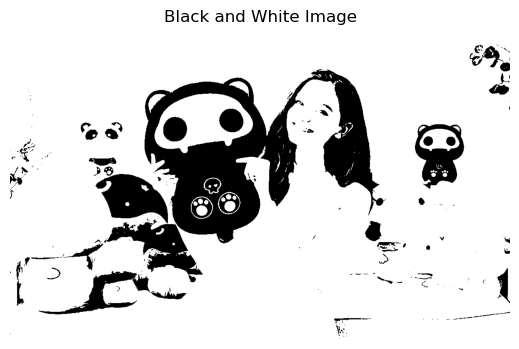

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Main variables
image_path = "l7.jpg"
invert = True

# Function to plot an image
# Source: https://stackoverflow.com/a/42314798
def plotimage(img, title=None, figsize=None, invert=False):
    if invert:
        img = np.max(img) - img.copy()
    
    h, w = img.shape
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1]) 
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Function to convert a grayscale image to binary
def gray_to_bw(gray, thresh):
    '''
    Returns a new image
    '''
    bw = gray.copy()
    bw[bw < thresh] = 0
    bw[bw >= thresh] = 255
    return bw 

# Load image and convert to grayscale
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = gray_to_bw(gray, 100) // 255
bw = 1 - bw  # Invert

# Plot the binary image
plotimage(bw, 'Black and White Image', (5,5), invert=invert)




In [2]:
# Define mask and mask center
mask = np.array((
    (0, 1, 0),
    (1, 1, 1),
    (0, 1, 0)
), dtype='uint8')
mask_center = (1, 1)
mask_plot = 10 * mask.copy()
mask_plot[mask_center[0], mask_center[1]] = 9



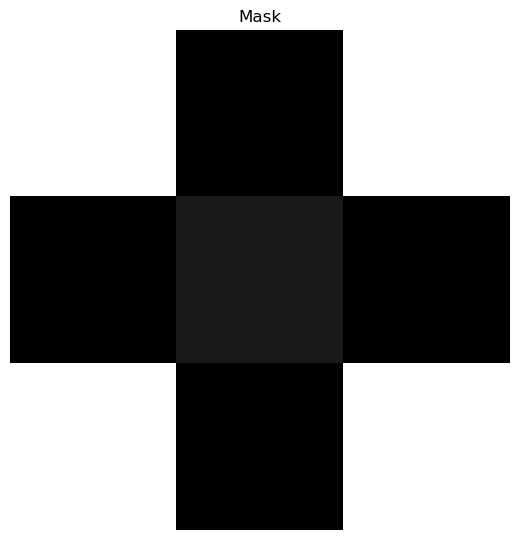

In [3]:
# Plot the mask
plotimage(mask_plot, 'Mask', (5,5), invert=invert)

# Function for image dilation
def dilation(bw, mask, mask_center):
    res = np.zeros_like(bw)
    maskheight, maskwidth = mask.shape
    
    for i in range(0, bw.shape[0] - maskheight + 1):
        for j in range(0, bw.shape[1] - maskwidth + 1):
            if bw[i + mask_center[0], j + mask_center[1]]:
                res[i:i + maskheight, j:j + maskwidth] |= mask
    
    return res



In [4]:
# Function for image erosion
def erosion(bw, mask, mask_center):
    res = np.zeros_like(bw)
    maskheight, maskwidth = mask.shape
    
    for i in range(0, bw.shape[0] - maskheight + 1):
        for j in range(0, bw.shape[1] - maskwidth + 1):
            if np.array_equal(bw[i:i + maskheight, j:j + maskwidth] & mask, mask):
                res[i + mask_center[0], j + mask_center[1]] = 1
    
    return res



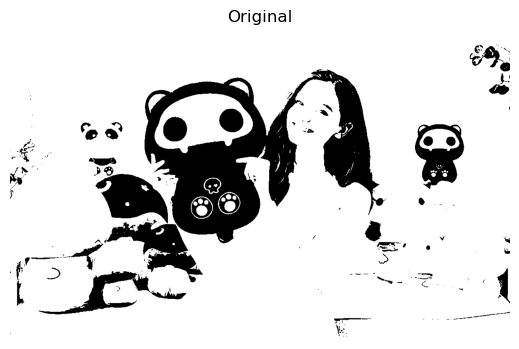

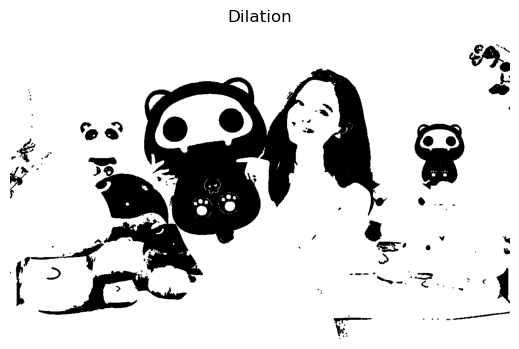

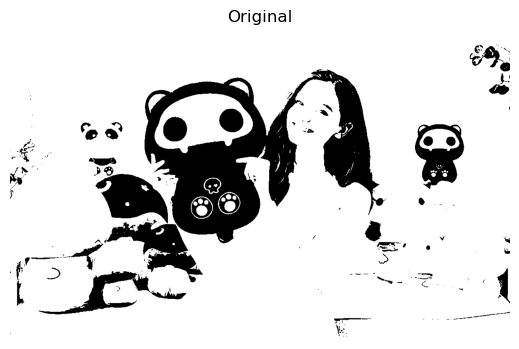

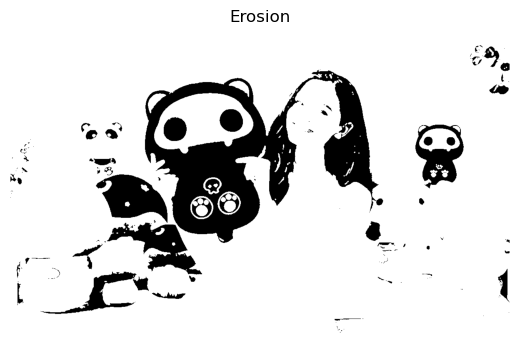

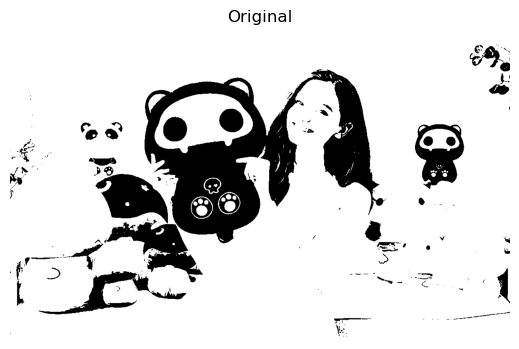

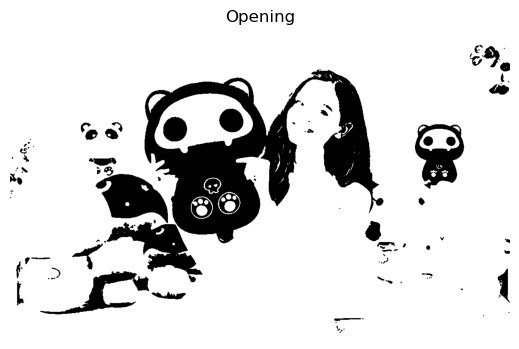

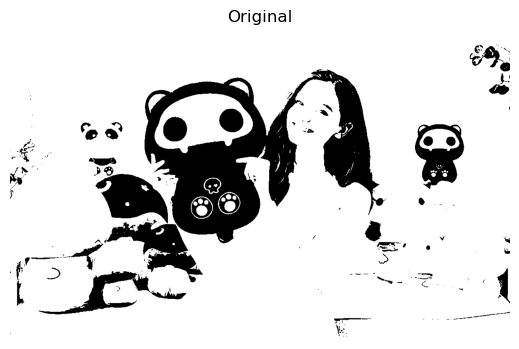

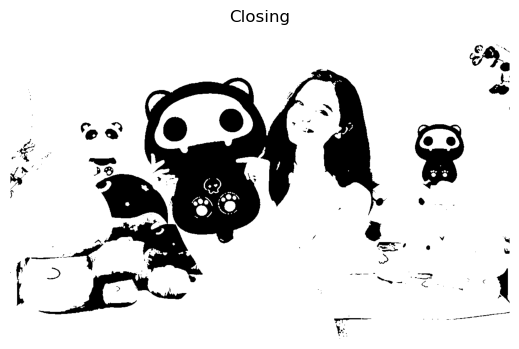

In [5]:
# Apply dilation and plot
d = dilation(bw, mask, mask_center)
plotimage(bw, "Original", (5,5), invert=invert)
plotimage(d, "Dilation", (5,5), invert=invert)

# Apply erosion and plot
e = erosion(bw, mask, mask_center)
plotimage(bw, "Original", (5,5), invert=invert)
plotimage(e, "Erosion", (5,5), invert=invert)

# Function for image opening
def opening(bw, mask, mask_center):
    return dilation(erosion(bw, mask, mask_center), mask, mask_center)

# Function for image closing
def closing(bw, mask, mask_center):
    return erosion(dilation(bw, mask, mask_center), mask, mask_center)

# Apply opening and plot
o = opening(bw, mask, mask_center)
plotimage(bw, "Original", (5,5), invert=invert)
plotimage(o, "Opening", (5,5), invert=invert)

# Apply closing and plot
c = closing(bw, mask, mask_center)
plotimage(bw, "Original", (5,5), invert=invert)
plotimage(c, "Closing", (5,5), invert=invert)